### Import Libraries

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn
%pip install matplotlib
%matplotlib inline
%pip install xgboost
%pip install statsmodels
%pip install warnings
%pip install openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='darkgrid', 
        rc={'figure.facecolor':'white'}, font_scale=1.2, color_codes=True)

%pip install scikit-learn
%pip install --upgrade scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, precision_recall_curve, classification_report
# from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm

from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load File

In [2]:
df = pd.read_csv('ibm_Telco_customer_churn.xlsx - Telco_Churn.csv') 
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Preprocess Data

#### Check missing values

#### Check data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
df.loc[(df["Total Charges"]==" "),"Total Charges"]=0
df["Total Charges"]=pd.to_numeric(df["Total Charges"])

In [5]:
# df["Total Charges"].info()
# df["Total Charges"].describe()

#### Rename data

In [6]:
df.rename(columns={"Tenure Months":"tenure"}, inplace=True)
# df["Tenure Months"]
df["tenure"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

### Correlation

['Count', 'Zip Code', 'Latitude', 'Longitude', 'tenure', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']


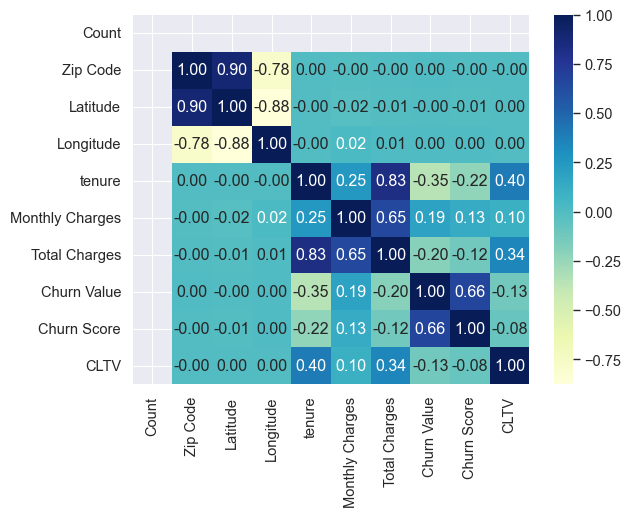

In [7]:
# categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='object']
# print(categorical_feature)

numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
print(numerical_feature)

corrnum=df[numerical_feature].corr() #only use for numeric variables, convert categorical to label
corrnum

dataplot=sns.heatmap(corrnum, cmap="YlGnBu", annot=True, fmt=".2f")
mp.show()
# corr_cltvval = df["CLTV"].corr(df["Churn Value"])
# corr_scoreval = df["Churn Score"].corr(df["Churn Value"])
# print(corr_cltvval)
# print(corr_scoreval)

### Drop columns not like features

In [8]:
# df.head()
x_val=df.drop(["Churn Value","Churn Score","Churn Reason","Churn Label","CLTV","Count","CustomerID","Country","State","Latitude","Longitude","Lat Long"], axis=1) #刪除指定欄位
x_val.head()

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [9]:
y_val=df["Churn Value"]
y_val.unique() #確保依變數是類別變數

# df["Churn Label"].unique()

array([1, 0], dtype=int64)

### One-hot encoding (Dummy encoding)

In [10]:
# df.columns if df[feature].dtypes!='object'

categoricalf=[f for f in x_val.columns if x_val[f].dtype=="object"]
# categoricalf
x_val_dummyencoded=pd.get_dummies(x_val[categoricalf], dtype=int)
x_val_dummyencoded.head()


,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


### Split training set and testing set 

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x_val_dummyencoded, y_val, test_size=0.2, random_state=0) #random_state=seed

### Ignore imbalance
#### Apply Scale to X

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train) #對特徵標準化，機器較容易學習
x_test=sc.transform(x_test)

#### XGboost

In [13]:
# import xgboost as xgb

# model_xgb=xgb.XGBClassifier(objective='binary:logistic')
# model_xgb.fit(x_train, 
#               y_train, 
#               eval_metric='aucpr', 
#               early_stopping_rounds=10, 
#               eval_set=[(x_test, y_test)])

In [14]:
# clf_xgb=xgb.XGBClassifier(objective="binary:logistic",
#                           missing=None, #default:None，XGBoost中忽略缺失值。
#                           seed=42)

clf_xgb=xgb.XGBClassifier(seed=42,
                          objective="binary:logistic",
                        #控制模型複雜度
                          gamma=0.25, #default:0，損失減少>0.25時，才會執行節點的分裂。如果損失減少<0.25，則停止分裂。
                          max_depth=4, #default:6，樹最大深度
                          reg_lamda=10, #default:1
                          scale_pos_weight=3, #default:1，處理依變數資料不平衡，讓模型更好學習少數資料特徵
                          
                        #增加隨機
                          learn_rate=0.1,#default:0.3，每次迭代時模型權重的更新幅度
                          sub_sample=0.9, #default:1，每棵樹用90%資料訓練
                          colsample_bytree=0.5) #default:1，每棵樹在訓練中使用50%特徵
# m=clf_xgb.fit(x_train,
#           y_train,
#           verbose=True, #default=True，在每個迭代時顯示訓練進度
#           early_stopping_rounds=10, #default=None，在模型效能為改善下可進行的最大回合數，如果效能10次沒顯著提升，訓練將停止。
#           eval_metric="aucpr",
#           eval_set=[(x_test, y_test)])

clf_xgb.fit(x_train,
          y_train,
          verbose=True, #default=True，在每個迭代時顯示訓練進度
          early_stopping_rounds=10, #default=None，在模型效能為改善下可進行的最大回合數，如果效能10次沒顯著提升，訓練將停止。
          eval_metric="aucpr",
          eval_set=[(x_test, y_test)])


[22:22:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learn_rate", "reg_lamda", "sub_sample" } are not used.

[0]	validation_0-aucpr:0.51888
[1]	validation_0-aucpr:0.54933
[2]	validation_0-aucpr:0.57935
[3]	validation_0-aucpr:0.58049
[4]	validation_0-aucpr:0.59488
[5]	validation_0-aucpr:0.59641
[6]	validation_0-aucpr:0.59839
[7]	validation_0-aucpr:0.59939
[8]	validation_0-aucpr:0.59974
[9]	validation_0-aucpr:0.60060
[10]	validation_0-aucpr:0.59380
[11]	validation_0-aucpr:0.59476
[12]	validation_0-aucpr:0.59481
[13]	validation_0-aucpr:0.59325
[14]	validation_0-aucpr:0.59457
[15]	validation_0-aucpr:0.59441
[16]	validation_0-aucpr:0.59461
[17]	validation_0-aucpr:0.59503
[18]	validation_0-aucpr:0.59497
[19]	validation_0-aucpr:0.59717


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [15]:
y_predict_xgb=clf_xgb.predict(x_test)
score_xgb=clf_xgb.score(x_test, y_test) #.score():accuracy
print(score_xgb)

print(classification_report(y_test, y_predict_xgb))

0.7352732434350603
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1048
           1       0.49      0.81      0.61       361

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.74      0.75      1409



#### Confusion matrix

In [16]:
import numpy as np
cnf_matrix_xgb=confusion_matrix(y_test,y_predict_xgb) 
np.set_printoptions(precision=2)
cnf_matrix_xgb

array([[744, 304],
       [ 69, 292]], dtype=int64)

In [17]:
import matplotlib.pyplot as mp
# %matplotlib inline

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=mp.cm.Blues):
    if normalize: #顯示比例
        # cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] #將n*1矩陣插入新的維度n*2運算
        cm=cm.astype("float")/cm.sum(axis=1)
        print("Confusion matrix")
    else:
        print("Confusion matrix")
    print(cm)

    mp.imshow(cm, cmap=cmap) #interpolation="nearest":不對cm像素作平滑插值處理
    # mp.imshow(cm, interpolation="nearest", cmap=cmap) #interpolation="nearest":不對cm像素作平滑插值處理
    mp.title(title)
    mp.colorbar()
    tick_marks=np.arange(len(classes)) #生成類別索引
    mp.xticks(tick_marks, classes, rotation=45) #設x軸標籤
    mp.yticks(tick_marks, classes) #設y軸標籤

    fmt=".2f" if normalize else "d"
    thresh=cm.max()/2.
    # print(thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #如果某格>矩陣最大值一半(門檻)，則字顯示白色
        mp.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j]>thresh else "black")
    mp.ylabel("True label")
    mp.xlabel("Predict label")
    mp.tight_layout()

Confusion matrix
[[744 304]
 [ 69 292]]


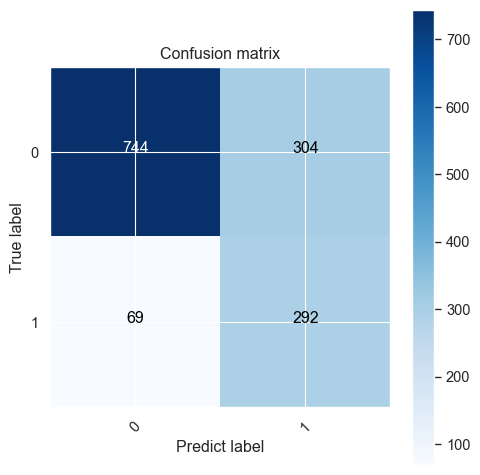

In [18]:
mp.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix_xgb, classes=[0, 1])

#### Logistic regression

In [19]:
clf_lgst=LogisticRegression()
clf_lgst.fit(x_train, y_train)

y_predict=clf_lgst.predict(x_test)
score=clf_lgst.score(x_test, y_test)
print(score)

print(classification_report(y_test, y_predict))


0.7352732434350603
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1048
           1       0.48      0.49      0.49       361

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.74      0.74      1409



#### Confusion matrix

In [20]:
import numpy as np
cnf_matrix=confusion_matrix(y_test,y_predict) 
np.set_printoptions(precision=2)
cnf_matrix

array([[858, 190],
       [183, 178]], dtype=int64)

Confusion matrix
[[858 190]
 [183 178]]


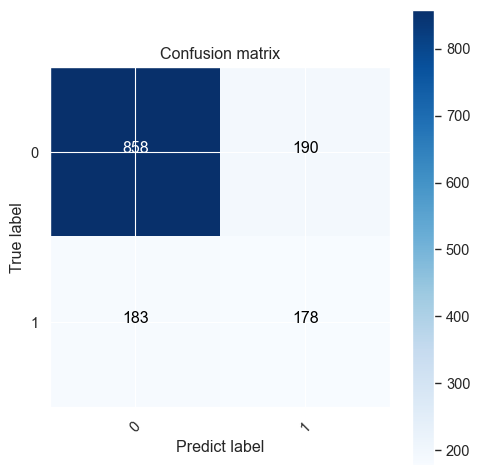

In [21]:
mp.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=[0, 1])


### Handle imbalance
#### Apply SMOTE to train x&y (deal with imbalance classification)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x_val_dummyencoded, y_val, test_size=0.2, random_state=0) #random_state=seed

In [23]:
%pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(x_train, y_train)

Note: you may need to restart the kernel to use updated packages.


#### Apply Scale to X

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train) #對特徵標準化，機器較容易學習
x_test=sc.transform(x_test)

#### Apply PCA to X (reduce dimensionality and increase interpretability in large X) 

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #dimension reduce to 2
pca.fit(x_train) #使用訓練來擬合PCA模型

x_train=pca.transform(x_train) #使用相同的PCA對訓練和測試降成2維
x_test=pca.transform(x_test)


# pca=PCA(n_components=2) 
# x_train=pca.fit_transform(x_train)
# x_test=pca.transform(x_test)

explained_variance=pca.explained_variance_ratio_
print(explained_variance) #第一個主成分可解釋69%變異，第二個主成分解釋31%變異

[0.01 0.  ]


<BarContainer object of 2 artists>

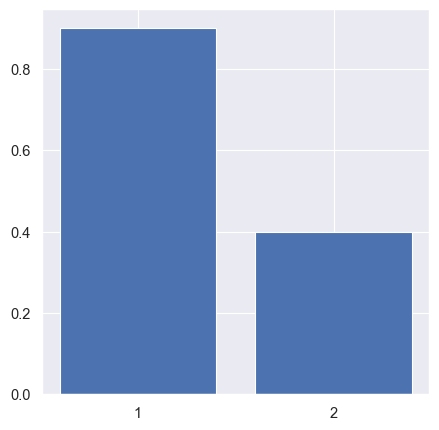

In [26]:
mp.figure(figsize=(5,5))
var=np.round(pca.explained_variance_ratio_*100, decimals=1)
lbls=[str(x) for x in range(1, len(var)+1)]
mp.bar(x=range(1, len(var)+1), height=var, tick_label=lbls)

#### Logistic
#### Scale + PCA 78%

In [27]:
clf_lgst_sclpca=LogisticRegression()
clf_lgst_sclpca.fit(x_train, y_train)

y_predict_sclpca=clf_lgst_sclpca.predict(x_test)


print(classification_report(y_test, y_predict_sclpca))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1048
           1       0.59      0.40      0.48       361

    accuracy                           0.78      1409
   macro avg       0.70      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409



#### SMOTE + PCA 70%

In [28]:
#smote to train x and y
%pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_smt, y_smt=sm.fit_resample(x_train, y_train)

# #standardize to x
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_res_sc=sc.fit_transform(x_res) #對特徵標準化，機器較容易學習
# x_test=sc.transform(x_test)

#PCA to x
pca=PCA(n_components=2) #dimension reduce to 2
pca.fit(x_smt) #使用訓練來擬合PCA模型

x_smt_pca=pca.transform(x_smt) #使用相同的PCA對訓練和測試降成2維
x_test_pca=pca.transform(x_test)



Note: you may need to restart the kernel to use updated packages.


In [29]:
clf_lgst_smtpca=LogisticRegression()
clf_lgst_smtpca.fit(x_smt_pca, y_smt)

y_predict_smtpca=clf_lgst_smtpca.predict(x_test_pca)


print(classification_report(y_test, y_predict_smtpca))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1048
           1       0.45      0.73      0.56       361

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.77      0.70      0.72      1409



#### XGBoost

#### SMOTE + PCA 51%

In [33]:
clf_xgb_smtpca=xgb.XGBClassifier(seed=42,
                          objective="binary:logistic",
                        #控制模型複雜度
                          gamma=0.25, #default:0，損失減少>0.25時，才會執行節點的分裂。如果損失減少<0.25，則停止分裂。
                          max_depth=4, #default:6，樹最大深度
                          reg_lamda=10, #default:1
                          scale_pos_weight=3, #default:1，處理依變數資料不平衡，讓模型更好學習少數資料特徵
                          
                        #增加隨機
                          learn_rate=0.1,#default:0.3，每次迭代時模型權重的更新幅度
                          sub_sample=0.9, #default:1，每棵樹用90%資料訓練
                          colsample_bytree=0.5) #default:1，每棵樹在訓練中使用50%特徵

clf_xgb_smtpca.fit(x_smt_pca,
          y_smt,
          verbose=True, #default=True，在每個迭代時顯示訓練進度
          early_stopping_rounds=10, #default=None，在模型效能為改善下可進行的最大回合數，如果效能10次沒顯著提升，訓練將停止。
          eval_metric="aucpr",
          eval_set=[(x_test_pca, y_test)]) #目的是訓練時持續監測模型在原始測試集上的效能，以判斷模型是否過擬合需要停止訓練。
          # eval_set=[(x_test_pca, y_test)])


y_predict_xgb_smtpca=clf_xgb_smtpca.predict(x_test_pca)#使用經過 PCA 和 SMOTE 處理後的測試集來進行預測，因為您的模型是在這些處理過的數據上進行訓練的。
print(classification_report(y_test, y_predict_xgb_smtpca))


[23:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learn_rate", "reg_lamda", "sub_sample" } are not used.

[0]	validation_0-aucpr:0.53949
[1]	validation_0-aucpr:0.52437
[2]	validation_0-aucpr:0.53832
[3]	validation_0-aucpr:0.52943
[4]	validation_0-aucpr:0.52481
[5]	validation_0-aucpr:0.52487
[6]	validation_0-aucpr:0.51959
[7]	validation_0-aucpr:0.51192
[8]	validation_0-aucpr:0.51147
[9]	validation_0-aucpr:0.50612
              precision    recall  f1-score   support

           0       0.96      0.36      0.52      1048
           1       0.34      0.96      0.50       361

    accuracy                           0.51      1409
   macro avg       0.65      0.66      0.51      1409
weighted avg       0.80      0.51      0.52      1409



#### Scale + PCA 31%

In [37]:
clf_xgb_sclpca=xgb.XGBClassifier(seed=42,
                          objective="binary:logistic",
                        #控制模型複雜度
                          gamma=0.25, #default:0，損失減少>0.25時，才會執行節點的分裂。如果損失減少<0.25，則停止分裂。
                          max_depth=4, #default:6，樹最大深度
                          reg_lamda=10, #default:1
                          scale_pos_weight=3, #default:1，處理依變數資料不平衡，讓模型更好學習少數資料特徵
                          
                        #增加隨機
                          learn_rate=0.1,#default:0.3，每次迭代時模型權重的更新幅度
                          sub_sample=0.9, #default:1，每棵樹用90%資料訓練
                          colsample_bytree=0.5) #default:1，每棵樹在訓練中使用50%特徵

clf_xgb_sclpca.fit(x_train,
          y_train,
          verbose=True, #default=True，在每個迭代時顯示訓練進度
          early_stopping_rounds=10, #default=None，在模型效能為改善下可進行的最大回合數，如果效能10次沒顯著提升，訓練將停止。
          eval_metric="aucpr",
          eval_set=[(x_test, y_test)]) #目的是訓練時持續監測模型在原始測試集上的效能，以判斷模型是否過擬合需要停止訓練。
          # eval_set=[(x_test_pca, y_test)])


y_predict_xgb_sclpca=clf_xgb_smtpca.predict(x_test)#使用經過 PCA 和 SMOTE 處理後的測試集來進行預測，因為您的模型是在這些處理過的數據上進行訓練的。
print(classification_report(y_test, y_predict_xgb_sclpca))


[23:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learn_rate", "reg_lamda", "sub_sample" } are not used.

[0]	validation_0-aucpr:0.53181
[1]	validation_0-aucpr:0.53845
[2]	validation_0-aucpr:0.55177
[3]	validation_0-aucpr:0.54719
[4]	validation_0-aucpr:0.53772
[5]	validation_0-aucpr:0.53123
[6]	validation_0-aucpr:0.52869
[7]	validation_0-aucpr:0.52657
[8]	validation_0-aucpr:0.52438


[9]	validation_0-aucpr:0.51879
[10]	validation_0-aucpr:0.52780
[11]	validation_0-aucpr:0.52742
[12]	validation_0-aucpr:0.52903
              precision    recall  f1-score   support

           0       0.99      0.07      0.13      1048
           1       0.27      1.00      0.42       361

    accuracy                           0.31      1409
   macro avg       0.63      0.53      0.28      1409
weighted avg       0.80      0.31      0.21      1409

